In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns



In [ ]:
file_path = '/content/drive/MyDrive/Datasets/spotify-2023.csv'

# Load the CSV file into a Pandas DataFrame with explicit encoding
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the DataFrame to verify the data has been loaded
df.head()



,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
# Checking for missing values
missing_values = df.isna().sum()

# Display columns with missing values and the count of missing values in each column
print(missing_values[missing_values > 0])


in_shazam_charts    50
key                 95
dtype: int64


In [ ]:
# Remove rows with missing values from 'in_shazam_charts' and 'key'
df.dropna(subset=['in_shazam_charts', 'key'], inplace=True)

# Checking for missing values
missing_values = df.isna().sum()

# Display columns with missing values and the count of missing values in each column
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [ ]:
# Checking duplicate rows
duplicate_rows = df.duplicated()

# Counting
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")

df.drop_duplicates(inplace=True)

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)


Number of duplicate rows: 0


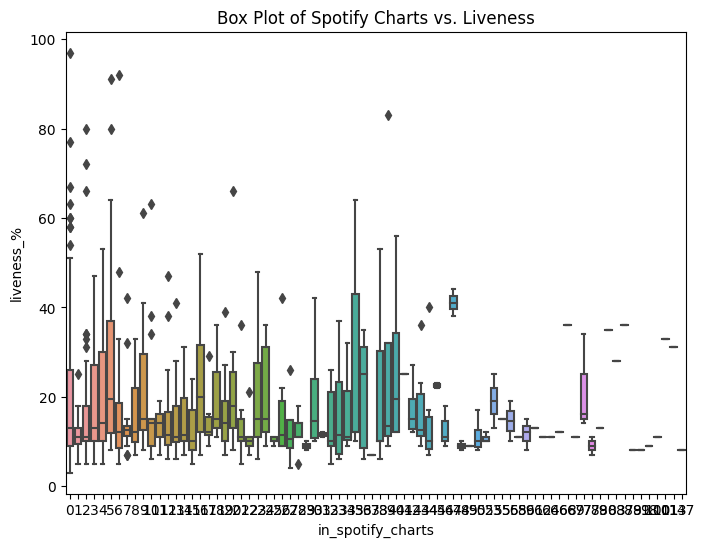

In [ ]:
#box plot o
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='in_spotify_charts', y='liveness_%')
plt.title('Box Plot of Spotify Charts vs. Liveness')
plt.show()




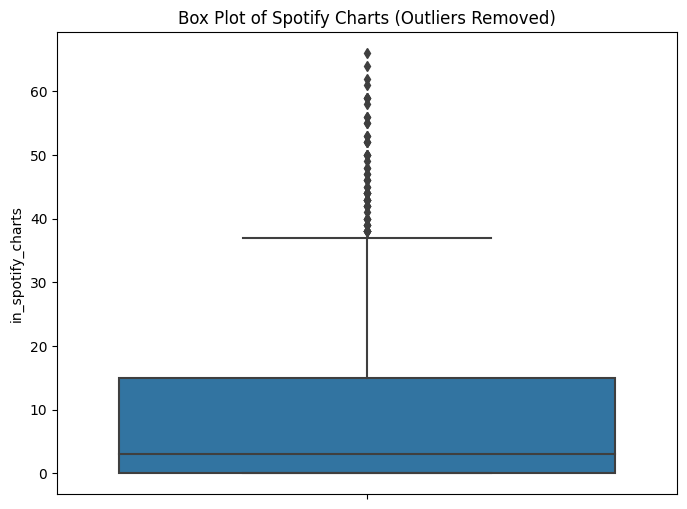

In [ ]:
#  Z-score threshold for outlier removal
z_threshold = 3

# Calculate Z-scores for 'in_spotify_charts' column
z_scores = np.abs((df['in_spotify_charts'] - df['in_spotify_charts'].mean()) / df['in_spotify_charts'].std())

# Identify and remove outliers based on the Z-score threshold
df_no_outliers = df[z_scores < z_threshold]

# Create a box plot of the cleaned data
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_no_outliers, y='in_spotify_charts')
plt.title('Box Plot of Spotify Charts (Outliers Removed)')
plt.show()


In [ ]:

# Calculate the average of 'in_spotify_charts' column
average_spotify_charts = df['in_spotify_charts'].mean()
print(f'Average of "in_spotify_charts": {average_spotify_charts:.2f}')

# Calculate the sum of 'liveness_%' column
sum_liveness = df['liveness_%'].sum()
print(f'Sum of "liveness_%": {sum_liveness:.2f}')


Average of "in_spotify_charts": 11.72
Sum of "liveness_%": 14844.00


In [ ]:
#Data Sampling:
sample_fraction = 0.2

#Randomly sample 20% of the dataset
sampled_df = df.sample(frac=sample_fraction, random_state=10)  # Set a random_state for reproducibility

print(f"Original DataFrame shape: {df.shape}")
print(f"Sampled DataFrame shape: {sampled_df.shape}")
print(sampled_df)


Original DataFrame shape: (817, 24)
Sampled DataFrame shape: (163, 24)
                            track_name  \
654                        Silent Hill   
764                          Heartless   
237                           PROVENZA   
809                    BackOutsideBoyz   
250                           En Paris   
..                                 ...   
188                         Las Morras   
100  Everybody Wants To Rule The World   
632               sentaDONA (Remix) s2   
80                      Still With You   
12                            Daylight   

                                        artist(s)_name  artist_count  \
654                        Kendrick Lamar, Kodak Black             2   
764                                         Kanye West             1   
237                                            Karol G             1   
809                                              Drake             1   
250                              El Chachito, Junior H          

8     49
10    66
31     9
11    90
28     8
      ..
45     1
67     1
51     2
63     2
54     1
Name: liveness_%, Length: 66, dtype: int64

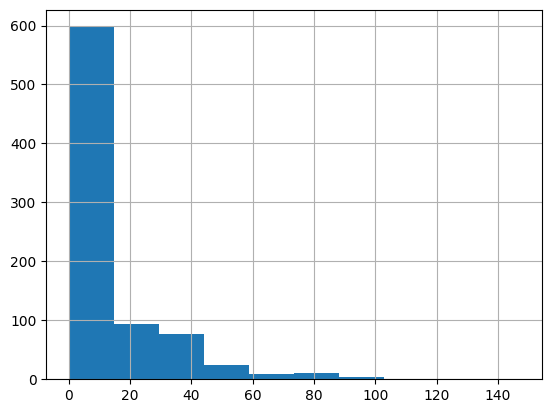

In [ ]:
df['in_spotify_charts'].hist(bins=10)
df['liveness_%'].value_counts(sort=False)


In [ ]:
#%% we can apply the cut() function to discretize the attribute into 4 bins of similar interval widths.
bins = pd.cut(df['in_spotify_charts'],4)
bins.value_counts(sort=False)

# bins = pd.qcut(df['in_spotify_charts'],4)
# bins.value_counts(sort=False)

(-0.147, 36.75]    734
(36.75, 73.5]       67
(73.5, 110.25]      14
(110.25, 147.0]      2
Name: in_spotify_charts, dtype: int64

In [ ]:
#%% The qcut() function can be used to partition the values into 4 bins such that each bin has nearly the same number of instances.
bins = pd.qcut(df['liveness_%'],4)
bins.value_counts(sort=False)

(2.999, 10.0]    264
(10.0, 12.0]     151
(12.0, 24.0]     203
(24.0, 97.0]     199
Name: liveness_%, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler with the feature range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))

# Specify the columns you want to scale and apply the scaling transformation
df[['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists',
   'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_charts', 'valence_%',
   'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']] = scaler.fit_transform(df[['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists',
   'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_charts', 'valence_%',
   'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']])



In [ ]:
# Select only numeric columns for PCA
numeric_df = df.select_dtypes(include=['number'])

numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(numeric_df)

projected = pca.transform(numeric_df)
projected = pd.DataFrame(projected, columns=['pc1', 'pc2'], index=range(1, len(projected) + 1))


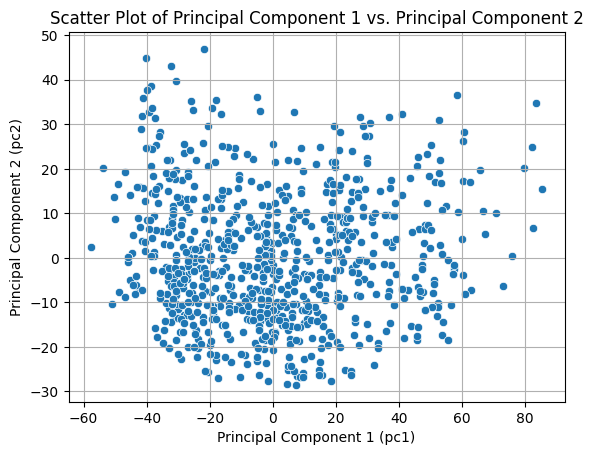

In [ ]:
# Create a scatter plot of pc1 vs. pc2
sns.scatterplot(data=projected, x='pc1', y='pc2')

# Label the axes and set the title
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.title('Scatter Plot of Principal Component 1 vs. Principal Component 2')

# Add gridlines
plt.grid(True)

# Show the plot
plt.show()
